In [ ]:
 !pip install tweepy==4.9.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tweepy
import pandas as pd
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
import nltk
nltk.download('vader_lexicon')

import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
#Bearer Token
client = tweepy.Client('your api token')

In [ ]:
# give me the tweets !!

query = 'apple diversity -is:retweet lang:en '
paginator = tweepy.Paginator(
    client.search_recent_tweets,           # The method you want to use
    query=query,                           # Some argument for this method
    max_results=50,                       # How many tweets per page
    limit=10                              # How many pages to retrieve
)


tweet_list = []

for tweet in paginator.flatten(): # Total number of tweets to retrieve
    tweet_list.append(tweet)
    print(tweet)
  

It's easier for nominal liberals to take a benign conservative like Tolkien and add some diversity to his works - again something I basically support - than to gamble on revolutionary truth in fantasy entertainment.
@minordissent @PhilippusArabus I lived in what was essentially an ethnostate with Conservative values. Life was  despite much lower tech base mostly better 

I'm hard pressed to see why getting rid of one problem , the stress caused by diversity is bad .
@DesiringGod80 Using the word "woke." Means you are literally part of the poorly uneducated white conservative demographic that refuse diversity, acceptance of others, liberation for women, and many progressive ideals.
@NikkiHaley @sunny @NikkiHaley has always embraced her Indian heritage. Not sure if Asunción understands the physical diversity that exists within India - light &amp; dark skin, short &amp; tall, straight &amp; curly hair, short &amp; long names all coexist. We are mostly conservative fyi! #conservativewomen


In [ ]:
def preprocess_tweet(sen):
    '''Cleans text data up, only 2 or more char long non-stepwords composed of A-Z & a-z only
    in lowercase'''
    
    sentence = sen.lower()

    # Remove RT
    sentence = re.sub('RT @\w+: '," ", sentence)

  
    sentence = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ", sentence) # regex for the removing the puctuations.

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)  # When we remove apostrophe from the word "Mark's", the apostrophe is replaced by an empty space. Hence, we are left with single character "s" that we are removing here.

    # Remove multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)  # Next, we remove all the single characters and replace it by a space which creates multiple spaces in our text. Finally, we remove the multiple spaces from our text as well.

    return sentence

In [ ]:
#Creates the  new dataframe and new features
tweet_list_df = pd.DataFrame(tweet_list)
tweet_list_df = pd.DataFrame(tweet_list_df['text'])
tweet_list_df.head(5)

,text
0,It's easier for nominal liberals to take a ben...
1,@minordissent @PhilippusArabus I lived in what...
2,"@DesiringGod80 Using the word ""woke."" Means yo..."
3,@NikkiHaley @sunny @NikkiHaley has always embr...
4,@NikkiHaley has always embraced her Indian her...


In [ ]:
def preprocess_tweet(sen):
    '''Cleans text data up, leaving only 2 or more char long non-stepwords composed of A-Z & a-z only
    in lowercase'''
    
    sentence = sen.lower()

    # Remove RT
    sentence = re.sub('RT @\w+: '," ", sentence)

    # Remove special characters
    sentence = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ", sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)  # When we remove apostrophe from the word "Mark's", the apostrophe is replaced by an empty space. Hence, we are left with single character "s" that we are removing here.

    # Remove multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)  # Next, we remove all the single characters and replace it by a space which creates multiple spaces in our text. Finally, we remove the multiple spaces from our text as well.

    return sentence

In [ ]:
cleaned_tweets = [] #tweets cleaning

for tweet in tweet_list_df['text']:
  cleaned_tweet = preprocess_tweet(tweet)
  cleaned_tweets.append(cleaned_tweet)

NameError: ignored

In [ ]:
tweet_list_df['cleaned'] = pd.DataFrame(cleaned_tweets) #cleaning done
tweet_list_df.head(5)

,text,cleaned
0,It's easier for nominal liberals to take a ben...,it easier for nominal liberals to take benign ...
1,@minordissent @PhilippusArabus I lived in what...,lived in what was essentially an ethnostate w...
2,"@DesiringGod80 Using the word ""woke."" Means yo...",using the word woke means you are literally p...
3,@NikkiHaley @sunny @NikkiHaley has always embr...,has always embraced her indian heritage not s...
4,@NikkiHaley has always embraced her Indian her...,has always embraced her indian heritage not s...


In [ ]:
#Calculates Negative, Positive, Neutral and Compound values

tweet_list_df[['polarity', 'subjectivity']] = tweet_list_df['cleaned'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tweet_list_df['cleaned'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if comp <= -0.05:
        tweet_list_df.loc[index, 'sentiment'] = "negative"
    elif comp >= 0.05:
        tweet_list_df.loc[index, 'sentiment'] = "positive"
    else:
        tweet_list_df.loc[index, 'sentiment'] = "neutral"
    tweet_list_df.loc[index, 'neg'] = neg
    tweet_list_df.loc[index, 'neu'] = neu
    tweet_list_df.loc[index, 'pos'] = pos
    tweet_list_df.loc[index, 'compound'] = comp

tweet_list_df.head(5)

,text,cleaned,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,It's easier for nominal liberals to take a ben...,it easier for nominal liberals to take benign ...,0.000000,0.000000,positive,0.000,0.619,0.381,0.9246
1,@minordissent @PhilippusArabus I lived in what...,lived in what was essentially an ethnostate w...,-0.181944,0.534722,negative,0.222,0.618,0.160,-0.4427
2,"@DesiringGod80 Using the word ""woke."" Means yo...",using the word woke means you are literally p...,0.033333,0.366667,positive,0.067,0.788,0.145,0.3818
3,@NikkiHaley @sunny @NikkiHaley has always embr...,has always embraced her indian heritage not s...,0.072222,0.447972,positive,0.045,0.870,0.085,0.1872
4,@NikkiHaley has always embraced her Indian her...,has always embraced her indian heritage not s...,0.072222,0.447972,positive,0.045,0.870,0.085,0.1872


In [ ]:
#Create new data frames for all sentiments (positive, negative and neutral)

tweet_list_df_negative = tweet_list_df[tweet_list_df["sentiment"]=="negative"]
tweet_list_df_positive = tweet_list_df[tweet_list_df["sentiment"]=="positive"]
tweet_list_df_neutral = tweet_list_df[tweet_list_df["sentiment"]=="neutral"]

In [ ]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [ ]:
#Count_values for sentiment
count_values_in_column(tweet_list_df,"sentiment")

,Total,Percentage
positive,117,54.42
negative,79,36.74
neutral,19,8.84


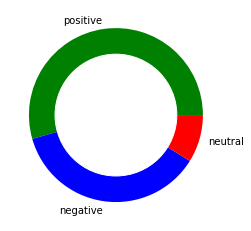

In [ ]:
#checking in the pie chart
pichart = count_values_in_column(tweet_list_df,"sentiment")
# names= pc.index
# size=pc["Percentage"]

names= pichart.index
size=pichart["Percentage"]

# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/My Drive/Project_TwitterAPI_Sentiments
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Project_TwitterAPI_Sentiments
c1_wordcloud.png  c2_sentimentanalysis_output.csv


In [ ]:
#Function to Create Wordcloud
# I am not doing this anymore.
def create_wordcloud(text):
    mask = np.array(Image.open("/content/drive/My Drive/Project_TwitterAPI_Sentiments/c1_wordcloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=20,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("c1_wordcloud.png")
    print("Word Cloud Saved Successfully")
    path="c1_wordcloud.png"
    display(Image.open(path))

In [ ]:
# Creating wordcloud for all tweets

#create_wordcloud(tweet_list_df["cleaned"].values)
# create_wordcloud(tweet_list_df_positive["text"].values)
# create_wordcloud(tweet_list_df_negative["cleaned"].values)
# create_wordcloud(tweet_list_df_neutral["text"].values)

ValueError: ignored

In [ ]:
#Calculating tweet's lenght and word count
tweet_list_df['text_len'] = tweet_list_df['cleaned'].astype(str).apply(len)
tweet_list_df['text_word_count'] = tweet_list_df['cleaned'].apply(lambda x: len(str(x).split()))

In [ ]:
round(pd.DataFrame(tweet_list_df.groupby("sentiment").text_len.mean()),2)

,text_len
sentiment,
negative,205.29
neutral,165.68
positive,205.09


In [ ]:
round(pd.DataFrame(tweet_list_df.groupby("sentiment").text_word_count.mean()),2)

,text_word_count
sentiment,
negative,33.81
neutral,26.68
positive,34.14


In [ ]:
# get the csv in dgrive  and need to send it splunk
tweet_list_df.to_csv("/content/drive/My Drive/Project_TwitterAPI_Sentiments/c2_sentimentanalysis_output.csv", sep=',', encoding='UTF-8')
tweet_list_df.head(5)

,text,cleaned,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count
0,It's easier for nominal liberals to take a ben...,it easier for nominal liberals to take benign ...,0.000000,0.000000,positive,0.000,0.619,0.381,0.9246,205,31
1,@minordissent @PhilippusArabus I lived in what...,lived in what was essentially an ethnostate w...,-0.181944,0.534722,negative,0.222,0.618,0.160,-0.4427,213,37
2,"@DesiringGod80 Using the word ""woke."" Means yo...",using the word woke means you are literally p...,0.033333,0.366667,positive,0.067,0.788,0.145,0.3818,198,29
3,@NikkiHaley @sunny @NikkiHaley has always embr...,has always embraced her indian heritage not s...,0.072222,0.447972,positive,0.045,0.870,0.085,0.1872,260,41
4,@NikkiHaley has always embraced her Indian her...,has always embraced her indian heritage not s...,0.072222,0.447972,positive,0.045,0.870,0.085,0.1872,261,41
